A notebook to demonstrate how to load a train DCGAN model on Mnist (Pytorch). DCGAN trained with `kmod.mnist.dcgan.py`.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import kmod
import kmod.glo as glo
import kmod.plot as plot

import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as stats
import torch
import torch.autograd
import torchvision

In [3]:
# font options
font = {
    #'family' : 'normal',
    #'weight' : 'bold',
    'size'   : 18
}

plt.rc('font', **font)
plt.rc('lines', linewidth=2)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Load a trained model

In [4]:
# load a model from the shared folder
shared_resource_path = glo.shared_resource_folder()
model_folder = glo.shared_resource_folder('prob_models', 'mnist_dcgan')
epochs = 30
batch_size = 64
model_fname = 'mnist_dcgan_ep{}_bs{}.pt'.format(epochs, batch_size)
model_fpath = os.path.join(model_folder, model_fname)

print('Shared resource path at: {}'.format(shared_resource_path))
print('Model folder: {}'.format(model_folder))
print('Model file: ', model_fname)

Shared resource path at: /is/ei/wittawat/Gdrive/kmod_share/
Model folder: /is/ei/wittawat/Gdrive/kmod_share/prob_models/mnist_dcgan
Model file:  mnist_dcgan_ep30_bs64.pt


In [5]:
import kmod.mnist.dcgan as mnist_dcgan
import kmod.net as net
from kmod.mnist.dcgan import DCGAN
from kmod.mnist.dcgan import Generator
# load the generator of type kmod.gen.PTNoiseTransformer
generator = net.SerializableModule.load(model_fpath)

In [6]:
print(type(generator))

<class 'kmod.gen.PTNoiseTransformerAdapter'>


In [7]:
print(generator)

Generator(
  (l1): Sequential(
    (0): Linear(in_features=100, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace)
    (5): Upsample(scale_factor=2, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2, inplace)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
)


<Figure size 576x360 with 0 Axes>

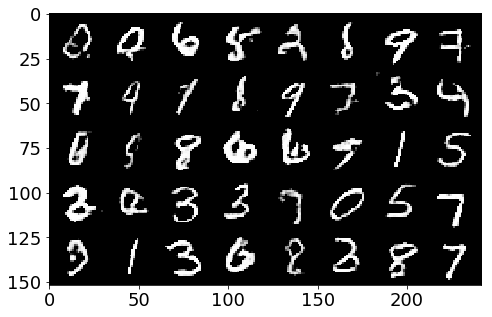

In [11]:
import kmod.plot as plot

# generate images and show
n_gen = 8*5
gen_imgs = generator.sample(n_gen)

plt.figure(figsize=(8, 5))
plot.show_torch_imgs(gen_imgs, nrow=8, figsize=(8, 5))